# Lab 3: Minimizing Cost

- 실제로 W에 대한 cost값을 그려보기!
- 여기서는 opmizer를 사용하지 않고, 직접 gradient descent를 코딩해본다

## Theoretical Overview

$$ H(x) = Wx $$

$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

 - $H(x)$: 주어진 $x$ 값에 대해 예측을 어떻게 할 것인가
 - $cost(W)$: $H(x)$ 가 $y$ 를 얼마나 잘 예측했는가

Note that it is simplified, without the bias $b$ added to $H(x)$.

## Imports

In [0]:
import matplotlib.pyplot as plt   # 시각화용 라이브러리
import numpy as np
import torch
import torch.optim as optim

In [0]:
# For reproducibility
torch.manual_seed(1)

## Data

We will use fake data for this example.

기본적으로 PyTorch는 NCHW 형태이다.

In [0]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

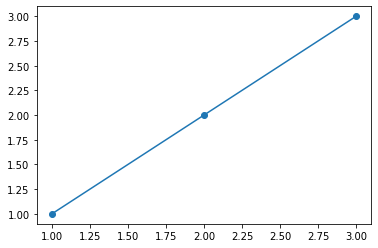

In [0]:
# 아래와 같은 그래프를 그려보기 위해 plt함수 사용

# Data
plt.scatter(x_train, y_train)   # scatter() : x와 y train점을 찍어준다.

# Best-fit line
xs = np.linspace(1, 3, 1000)  # 1~3 사이의 간격에 1000개의 데이터를 만들어라. = 1000등분.
plt.plot(xs, xs)              # xs로 인해서 아래와 같은 plot이 그려진다.

In [0]:
print(xs)

[1.         1.002002   1.004004   1.00600601 1.00800801 1.01001001
 1.01201201 1.01401401 1.01601602 1.01801802 1.02002002 1.02202202
 1.02402402 1.02602603 1.02802803 1.03003003 1.03203203 1.03403403
 1.03603604 1.03803804 1.04004004 1.04204204 1.04404404 1.04604605
 1.04804805 1.05005005 1.05205205 1.05405405 1.05605606 1.05805806
 1.06006006 1.06206206 1.06406406 1.06606607 1.06806807 1.07007007
 1.07207207 1.07407407 1.07607608 1.07807808 1.08008008 1.08208208
 1.08408408 1.08608609 1.08808809 1.09009009 1.09209209 1.09409409
 1.0960961  1.0980981  1.1001001  1.1021021  1.1041041  1.10610611
 1.10810811 1.11011011 1.11211211 1.11411411 1.11611612 1.11811812
 1.12012012 1.12212212 1.12412412 1.12612613 1.12812813 1.13013013
 1.13213213 1.13413413 1.13613614 1.13813814 1.14014014 1.14214214
 1.14414414 1.14614615 1.14814815 1.15015015 1.15215215 1.15415415
 1.15615616 1.15815816 1.16016016 1.16216216 1.16416416 1.16616617
 1.16816817 1.17017017 1.17217217 1.17417417 1.17617618 1.1781

## Cost by W
실제로 cost가 어떻게 계산되는지 눈으로 봐보자!

$$ H(x) = Wx $$

W가 -5~7 의 값을 가질때, COST 함수의 변화를 보기

In [0]:
# -5 ~ 7 사이를 1000등분해서 w_l
# cost list

# w_list
W_l = np.linspace(-5, 7, 1000)  #-5~7 사이를 1000등분하기 

# cost list
cost_l = []       # list : 순차적으로 데이터를 담는 추상자료형  
for W in W_l:
    hypothesis = W * x_train  # W는 -5~7로 계속 변화하고 있다.
    cost = torch.mean((hypothesis - y_train) ** 2)  

    cost_l.append(cost.item())  # cost list에 구해진 cost값을 매번 담기

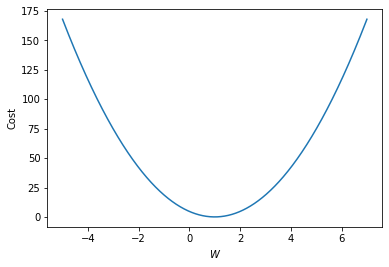

In [0]:
plt.plot(W_l, cost_l)  # 2D 그림 그리기 x축은 w list, y축은 cost list
plt.xlabel('$W$')
plt.ylabel('Cost')
plt.show()             # 이 함수를 넣어야지만 plot과 label값이 모두 그려진다.

## Gradient Descent by Hand
Gradient Descent 를 직접 코딩해보기(optimizer를 사용하지 않고)

In [0]:
W = 0



$$ cost(W) = \frac{1}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)^2 $$

cost를 W로 미분

$$ \nabla W = \frac{\partial cost}{\partial W} = \frac{2}{m} \sum^m_{i=1} \left( Wx^{(i)} - y^{(i)} \right)x^{(i)} $$




In [0]:
# gradient = cost를 W로 미분한 값
    # 위의 식에서 시그마 이후의 값만 계산한것이다.
    # 2/m은 곱하지 않았음. 생략가능하다.   

gradient = torch.sum((W * x_train - y_train) * x_train)   
print(gradient)

tensor(-14.)


$$ W := W - \alpha \nabla W $$

In [0]:
# 다음 W 값을 구하기
# w = w - lr*gradient

lr = 0.1
W -= lr * gradient  # W = W- (lr*gradient)
print(W)  # 0 이었던 W가 1.4 가 된다.

tensor(1.4000)


## Training

- 아래와 같이 여러번 반복하면 Cost는 작아지고 W는 1에 수렴하게 된다.

In [0]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1)
# learning rate 설정
lr = 0.1

nb_epochs = 10
for epoch in range(nb_epochs + 1):   
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost gradient 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    gradient = torch.sum((W * x_train - y_train) * x_train)

    print('Epoch {:4d}/{} W: {:.3f}, Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost gradient로 H(x) 개선
    W -= lr * gradient

Epoch    0/10 W: 0.000, Cost: 4.666667
Epoch    1/10 W: 1.400, Cost: 0.746666
Epoch    2/10 W: 0.840, Cost: 0.119467
Epoch    3/10 W: 1.064, Cost: 0.019115
Epoch    4/10 W: 0.974, Cost: 0.003058
Epoch    5/10 W: 1.010, Cost: 0.000489
Epoch    6/10 W: 0.996, Cost: 0.000078
Epoch    7/10 W: 1.002, Cost: 0.000013
Epoch    8/10 W: 0.999, Cost: 0.000002
Epoch    9/10 W: 1.000, Cost: 0.000000
Epoch   10/10 W: 1.000, Cost: 0.000000


## Training with `optim`

- 이전 실습에서 optimizer를 사용했던 예시
- gradient descent를 직접 코딩했을 때와 optimizer를 이용했을 때를 비교. 결과는 같다.

In [0]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W], lr=0.15)

nb_epochs = 10
for epoch in range(nb_epochs + 1):   
    
    # H(x) 계산
    hypothesis = x_train * W
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    print('Epoch {:4d}/{} W: {:.3f} Cost: {:.6f}'.format(
        epoch, nb_epochs, W.item(), cost.item()
    ))

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

Epoch    0/10 W: 0.000 Cost: 4.666667
Epoch    1/10 W: 1.400 Cost: 0.746667
Epoch    2/10 W: 0.840 Cost: 0.119467
Epoch    3/10 W: 1.064 Cost: 0.019115
Epoch    4/10 W: 0.974 Cost: 0.003058
Epoch    5/10 W: 1.010 Cost: 0.000489
Epoch    6/10 W: 0.996 Cost: 0.000078
Epoch    7/10 W: 1.002 Cost: 0.000013
Epoch    8/10 W: 0.999 Cost: 0.000002
Epoch    9/10 W: 1.000 Cost: 0.000000
Epoch   10/10 W: 1.000 Cost: 0.000000
